# Partie Thermique

---

In [38]:
#Initialisation des constante

lbda = 0.96
rho = 2550
Cp = 840

N = 2
R = 1

t = 10
Nt = 10000

Text = [1670]*(Nt)
Tref = 1770

In [25]:
#Calcule des constantes
W = 2*lbda/(rho * Cp)
dr = R / N
dt = t / Nt

T = []

#Text.insert(0, Tref)

#Initialisation de la temperaure
for i in range(Nt):
    T.append(( ([Tref]*(N+0)) + [Text[i]] ))

In [26]:
'''
c1 = []
Tprec=Text[0]

for i in range(N, -1, -1):
    print(Tprec)
    ca = dr * i * (Tprec - T[0][i]) / (W*dt)
    da = Tprec - ca * dr * i
    T[1][i] = ca * dr * i + da
    Tprec = ca * dr * (i-1) + da
    c1.append(ca)

for m in range(2, Nt):
    Tprec = Text[m]

    for i in range(N, -1, -1):
        ca = dr * i * (Tprec - T[m-1][i]) / (W*dt) * (-1 if i == N else 1)
        da = Tprec - dr * i * (c1[i] if i != N else ca)
        T[m][i] = ca * dr * i + da
        Tprec = ca * dr * (i-1) + da
'''

'\nc1 = []\nTprec=Text[0]\n\nfor i in range(N, -1, -1):\n    print(Tprec)\n    ca = dr * i * (Tprec - T[0][i]) / (W*dt)\n    da = Tprec - ca * dr * i\n    T[1][i] = ca * dr * i + da\n    Tprec = ca * dr * (i-1) + da\n    c1.append(ca)\n\nfor m in range(2, Nt):\n    Tprec = Text[m]\n\n    for i in range(N, -1, -1):\n        ca = dr * i * (Tprec - T[m-1][i]) / (W*dt) * (-1 if i == N else 1)\n        da = Tprec - dr * i * (c1[i] if i != N else ca)\n        T[m][i] = ca * dr * i + da\n        Tprec = ca * dr * (i-1) + da\n'

In [27]:
for m in range(Nt):
    for i in range(N):
        T[m][i] = W * dt * ( (T[m-1][i+1] - 2*T[m-1][i] + T[m-1][i-1])/(dr*dr) + 4*(T[m-1][i+1] - T[m-1][i]) / ( dr * dr * (2*i + 1))) + T[m-1][i]

In [28]:
Tim = [ [ (T[m][i] + T[m][i-1])/2 for i in range(1, N+0)] for m in range(0, Nt)]
DTim = [ [Tref - Tim[m][i] for i in range(len(Tim[0]))] for m in range(len(Tim))]

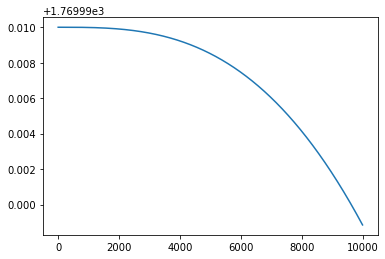

In [29]:
from matplotlib import pyplot as plt

a = [ T[i][N-3] for i in range(len(T))]
plt.plot(range(Nt), a)

In [54]:
print(T)

[[299.99612773109243, 300.0, 300.0, 299.9939150060024, 273], [299.99225879428855, 299.9999994446494, 299.9999984291511, 299.9878322560746, 273], [299.9883931863228, 299.99999833416587, 299.9999952885838, 299.9817517491638, 273], [299.98453090393264, 299.9999966687669, 299.9999905794279, 299.97567348421757, 273], [299.98067194385845, 299.9999944486699, 299.99998430281244, 299.9695974601842, 273], [299.97681630284364, 299.9999916740919, 299.9999764598658, 299.96352367601247, 273], [299.9729639776345, 299.9999883452499, 299.9999670517157, 299.9574521306517, 273], [299.9691149649803, 299.9999844623606, 299.9999560794891, 299.95138282305174, 273], [299.9652692616333, 299.9999800256405, 299.9999435443123, 299.9453157521631, 273], [299.96142686434865, 299.999975035306, 299.999929447311, 299.9392509169366, 273]]


# Partie Mécanique

---

In [32]:

def A(i):
    return "A"+str(i)

def B(i):
    return "B"+str(i)

## Construction de M et de R

In [39]:
M = [[0 for i in range(2*N)] for j in range(2*N)]
R = [0]*(2*N)

M[0][0] = 1

M[2*N-1][2*N-2] = "-r"+str(N)
M[2*N-1][2*N-1] = -1
R[2*N-1] = "p"


temps = Nt-1


for i in range(1, N):
    r = "r"+str(i)
    M[ 2*(i-1) + 1][ 2*(i-1) : 2*(i-1) + 4] = ["-"+r, "-1", r, 1]

for i in range(1,N):
    r = " r"+str(i)
    M[2*(i-1)+2][2*(i-1) : 2*(i-1) + 4] = ["-"+A(i)+r, "-"+B(i), A(i+1)+r, B(i+1)]

    R[2*(i-1)+2] = 1
print(M)

[[1, 0, 0, 0], ['-r1', '-1', 'r1', 1], ['-A1 r1', '-B1', 'A2 r1', 'B2'], [0, 0, '-r2', -1]]
